In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(context="notebook", style="ticks", font="Helvetica")
import numpy as np

In [54]:
datasets = sorted([
    "somatosensory_converted_into_tpm",
    "Dopaminergic_TPM_clean",
    "kakadarov_tpm",
    "Cheng_ES_TPM",
    "Gaublomme_GSE75109_TPM_clean",
    "Gaublomme_GSE75110_TPM_clean",
    "Gaublomme_GSE75111_TPM_clean",
    "Rbp4_positive_cells",
    "Alveolar_cells_Type_I_Merged_Batches",
    "Alveolar_cells_Type_II_Merged_Batches",
#     "Alveolar_cells_both_types",
    "klein",
    "hepat_TPM_yang_clean",
    "Yu_First_wave_endocrine_cells",
])

In [55]:
cell_type_names = {
    "somatosensory_converted_into_tpm": "Somatosensory N",
    "Dopaminergic_TPM_clean": "Dopaminergic N",
    "kakadarov_tpm": "CD8+ T cell",
    "Cheng_ES_TPM": "Isolated ESC",
    "Gaublomme_GSE75109_TPM_clean": "Th17 A",
    "Gaublomme_GSE75110_TPM_clean": "Th17 B",
    "Gaublomme_GSE75111_TPM_clean": "Th17 C",
    "Rbp4_positive_cells": "Corticostriatal N",
    "Alveolar_cells_Type_I_Merged_Batches": "Lung ACI",
    "Alveolar_cells_Type_II_Merged_Batches": "Lung ACII",
#     "Alveolar_cells_both_types",
    "klein": "Cultured ESC",
    "hepat_TPM_yang_clean": "Liver HB/HC",
    "Yu_First_wave_endocrine_cells": "Pancreatic EC",
}

In [56]:
def load_pvalues(stretch):
    dfs = [pd.read_csv("{}/chr_stat_test_pvalues_{}.csv".format(x, stretch)) for x in datasets] 
    for i, dataset in enumerate(datasets):
        dfs[i].loc[:,"dataset"] = dataset
    df = pd.concat(dfs)
    return df

In [57]:
dfs = {x: load_pvalues(x) for x in ["7", "14", "21"]}

In [58]:
df = dfs["14"]

In [59]:
df = df.replace(cell_type_names)

In [60]:
def transform(df):
    orig = df.loc[:, ["metric", "orig_value"]]
    shuf = df.loc[:, ["metric", "shuffled_value"]]
    orig.columns = ["metric", "value"]
    shuf.columns = ["metric", "value"]
    orig.loc[:,"Distribution"] = "Original"
    shuf.loc[:,"Distribution"] = "Median Shuffled"
    
    return pd.concat([orig, shuf])

t_df = df.groupby("dataset").apply(transform).reset_index()

In [61]:
df.loc[:,"Difference"] = (df.orig_value - df.shuffled_value)
df.loc[:,"-log2 p-value"] = -np.log2(df.pvalue)
df.loc[:,"Cell Type"] = df.dataset
cutoff=-np.log2(0.025)
cutoff

5.321928094887363

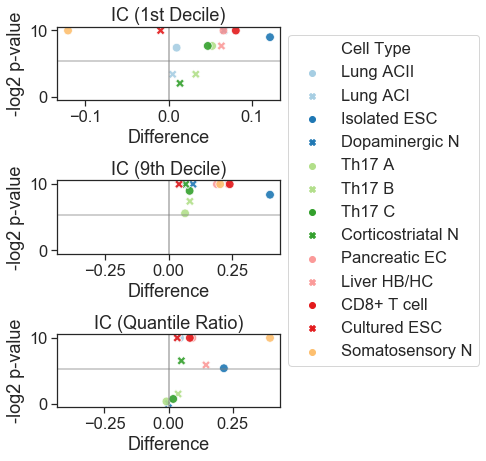

In [80]:
current_palette = sns.color_palette("Paired", n_colors=7)
new_palette = []
for x in current_palette:
    new_palette += [x,x]
new_palette = new_palette[:13]

def plot_volcano(_df, title, ax, legend=False):
    sns.set(font_scale=1.5, style="ticks", font="Arial")
    filled_markers = ['o', 'X']*7
    sns.scatterplot(data=_df,x="Difference",y="-log2 p-value",hue="Cell Type",style="Cell Type",markers=filled_markers,legend=legend,s=75,alpha=0.9,palette=new_palette,ax=ax)
    xlim = max(_df.Difference.max(),_df.Difference.min())*1.1
    sns.lineplot([-xlim,xlim],[cutoff, cutoff],dashes=True,color="grey", alpha=0.5,ax=ax)
    sns.distplot([0], kde=False, hist=False, rug=True, rug_kws={"height": 1.0, "linewidth": 2, "alpha": 0.5, "color": "grey"},ax=ax)
    ax.set_xlim([-xlim,xlim])
    if legend:
        ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.set_title(title)

_, axs = plt.subplots(3,1,figsize=(4,7))
plt.subplots_adjust(hspace=1.1)
plot_volcano(df.loc[df.metric == "percentile_10"], "IC (1st Decile)", axs[0], legend="full")
plot_volcano(df.loc[df.metric == "percentile_90"], "IC (9th Decile)", axs[1])
plot_volcano(df.loc[df.metric == "quantile_ratio"], "IC (Quantile Ratio)", axs[2])
plt.show()


In [63]:
df[df.metric == "percentile_90"].reset_index()

,index,metric,orig_value,shuffled_value,pvalue,dataset,Difference,-log2 p-value,Cell Type
0,1,percentile_90,1.492828,1.430308,0.000999,Lung ACII,0.062521,9.967226,Lung ACII
1,1,percentile_90,1.318082,1.276867,0.000999,Lung ACI,0.041215,9.967226,Lung ACI
2,1,percentile_90,1.678892,1.280374,0.002997,Isolated ESC,0.398517,8.382264,Isolated ESC
3,1,percentile_90,1.869118,1.773108,0.000999,Dopaminergic N,0.096010,9.967226,Dopaminergic N
4,1,percentile_90,1.440378,1.375539,0.020979,Th17 A,0.064839,5.574909,Th17 A
5,1,percentile_90,1.472826,1.388962,0.005994,Th17 B,0.083864,7.382264,Th17 B
6,1,percentile_90,1.458549,1.375879,0.001998,Th17 C,0.082670,8.967226,Th17 C
7,1,percentile_90,1.381532,1.314020,0.000999,Corticostriatal N,0.067512,9.967226,Corticostriatal N
8,1,percentile_90,1.560065,1.370201,0.000999,Pancreatic EC,0.189864,9.967226,Pancreatic EC
9,1,percentile_90,1.595073,1.358263,0.000999,Liver HB/HC,0.236810,9.967226,Liver HB/HC


In [64]:
def draw_pvalues(ax, x, dataset, metric):
    y = df.loc[(df.metric == metric) & (df.dataset == dataset), ["orig_value", "shuffled_value"]].max().max()
    ax.text(x, y+0.05, "{:.1E}".format(df.loc[(df.metric == metric) & (df.dataset == dataset), "pvalue"].values[0]), horizontalalignment='center', fontsize=20)

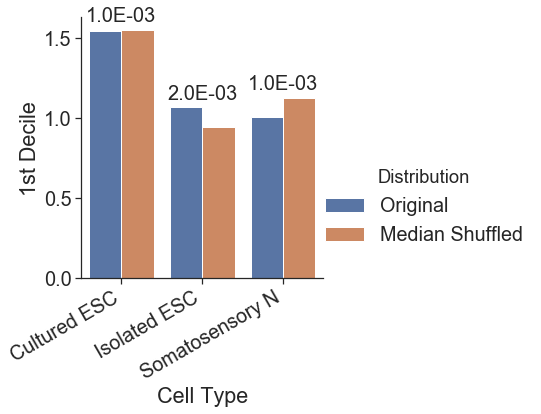

In [65]:
sns.set(font_scale=1.8, style="ticks", font="Arial")
_df = df.loc[df.metric == "percentile_10"]
_df = _df.reset_index()
_df = _df.loc[[11,2,12]]
_datasets = _df.dataset
_df = _df.groupby("dataset").apply(transform).reset_index()
g = sns.catplot(data=_df, x="dataset", y="value", hue="Distribution", kind="bar", sharey=False, aspect=1.1)
plt.xticks(rotation = 30, ha="right")
plt.ylabel("1st Decile")
plt.xlabel("Cell Type")
for x, name in enumerate(_datasets):
    draw_pvalues(g.ax, x, name, "percentile_10")

In [66]:
ks_dfs = [pd.read_csv("{}/chr_ks.csv".format(x)) for x in datasets]

In [67]:
ks = pd.concat(ks_dfs)
ks.index = datasets
ks = ks.rename(cell_type_names, axis=0)

In [68]:
ks

,7,14,21,14.1
Lung ACII,3.304431e-14,4.575621e-34,4.530105e-52,4.575621e-34
Lung ACI,2.727157e-07,1.386439e-16,1.551025e-24,1.386439e-16
Isolated ESC,2.045317e-103,3.464444e-30,1.495470e-12,3.464444e-30
Dopaminergic N,7.505733e-18,4.507401e-24,2.185350e-17,4.507401e-24
Th17 A,1.748388e-16,3.145156e-06,1.337999e-05,3.145156e-06
Th17 B,5.148210e-03,8.552461e-02,3.357316e-02,8.552461e-02
Th17 C,5.872471e-14,1.589848e-05,1.177147e-04,1.589848e-05
Corticostriatal N,1.986580e-22,1.575069e-13,2.062514e-03,1.575069e-13
Pancreatic EC,2.986870e-170,1.402003e-126,8.188813e-101,1.402003e-126
Liver HB/HC,2.590298e-35,9.195939e-15,2.237932e-11,9.195939e-15


In [69]:
# t_df[(t_df.dataset == "Cheng_ES_TPM") & (t_df.metric == "median")]
# ks.to_csv("ks_summary.csv",float_format="%.1E")
def get_row(dataset, stretch):
    metrics = ["percentile_10", "percentile_90", "percentile_97.5", "percentile_02.5", "quantile_ratio", "median"]
    _df = df.loc[df.metric.isin(metrics) & (df.dataset == dataset)]
    row_values = [ks.loc[dataset, stretch]]
    for metric in metrics:
        values = _df.loc[_df.metric == metric, ["orig_value", "shuffled_value"]].values
        row_values += list(np.reshape(values, (-1,))) + [_df.loc[_df.metric == metric, "pvalue"].values[0]]
    index = pd.MultiIndex.from_product([metrics, ["orig_value", "shuffled_value", "pvalue"]])
    index = pd.MultiIndex.from_frame(pd.DataFrame(np.vstack([[("ks", "pvalue")],list(index.values)])))    
    row = pd.Series(row_values, index=index, name=(dataset, stretch))
    return row



In [70]:
m_index = pd.MultiIndex.from_product([cell_type_names.values(), ["7", "14", "21"]])
summary = pd.DataFrame([get_row(*x) for x in m_index.values], index=m_index)

In [71]:
summary

0                                ks percentile_10                           \
1                            pvalue    orig_value shuffled_value    pvalue   
Somatosensory N   7    1.701040e-38      1.004926       1.125111  0.000999   
                  14   6.226610e-20      1.004926       1.125111  0.000999   
                  21   1.497835e-16      1.004926       1.125111  0.000999   
Dopaminergic N    7    7.505733e-18      1.279078       1.212888  0.000999   
                  14   4.507401e-24      1.279078       1.212888  0.000999   
                  21   2.185350e-17      1.279078       1.212888  0.000999   
CD8+ T cell       7   5.763056e-101      1.486412       1.405978  0.000999   
                  14  1.946109e-152      1.486412       1.405978  0.000999   
                  21  2.056480e-170      1.486412       1.405978  0.000999   
Isolated ESC      7   2.045317e-103      1.066724       0.945437  0.001998   
                  14   3.464444e-30      1.066724       0.945437  0.001998   
                  21   1.495470e-12      1.066724       0.945437  0.001998   
Th17 A            7    1.748388e-16      1.035314       0.983161  0.004995   
                  14   3.145156e-06      1.035314       0.983161  0.004995   
                  21   1.337999e-05      1.035314       0.983161  0.004995   
Th17 B            7    5.148210e-03      1.017594       0.985022  0.095904   
                  14   8.552461e-02      1.017594       0.985022  0.095904   
                  21   3.357316e-02      1.017594       0.985022  0.095904   
Th17 C            7    5.872471e-14      1.050951       1.004042  0.004995   
                  14   1.589848e-05      1.050951       1.004042  0.004995   
                  21   1.177147e-04      1.050951       1.004042  0.004995   
Corticostriatal N 7    1.986580e-22      1.009559       0.995881  0.248751   
                  14   1.575069e-13      1.009559       0.995881  0.248751   
                  21   2.062514e-03      1.009559       0.995881  0.248751   
Lung ACI          7    2.727157e-07      1.022481       1.017588  0.096903   
                  14   1.386439e-16      1.022481       1.017588  0.096903   
                  21   1.551025e-24      1.022481       1.017588  0.096903   
Lung ACII         7    3.304431e-14      1.119324       1.109683  0.005994   
                  14   4.575621e-34      1.119324       1.109683  0.005994   
                  21   4.530105e-52      1.119324       1.109683  0.005994   
Cultured ESC      7    1.427931e-31      1.540010       1.549493  0.000999   
                  14  1.960149e-105      1.540010       1.549493  0.000999   
                  21  4.389853e-192      1.540010       1.549493  0.000999   
Liver HB/HC       7    2.590298e-35      0.981803       0.918621  0.004995   
                  14   9.195939e-15      0.981803       0.918621  0.004995   
                  21   2.237932e-11      0.981803       0.918621  0.004995   
Pancreatic EC     7   2.986870e-170      1.069190       1.003528  0.000999   
                  14  1.402003e-126      1.069190       1.003528  0.000999   
                  21  8.188813e-101      1.069190       1.003528  0.000999   

0                    percentile_90                          percentile_97.5  \
1                       orig_value shuffled_value    pvalue      orig_value   
Somatosensory N   7       2.027392       1.824593  0.000999        2.390538   
                  14      2.027392       1.824593  0.000999        2.390538   
                  21      2.027392       1.824593  0.000999        2.390538   
Dopaminergic N    7       1.869118       1.773108  0.000999        2.078807   
                  14      1.869118       1.773108  0.000999        2.078807   
                  21      1.869118       1.773108  0.000999        2.078807   
CD8+ T cell       7       2.283416       2.043180  0.000999        2.555541   
                  14      2.283416       2.043180  0.000999        2.555541   
           

In [72]:
summary.to_csv("chr_stats_test_summary.csv")
